## 二次判别分析Quadratic Discriminant Analysis(QDA)

二次判别分析是另外一种线性判别分析算法，它与LDA拥有类似的算法特征，区别仅在于：当不同分类样本的协方差矩阵相同时，使用线性判别分析；当不同分类样本的协方差矩阵不同时，则应该使用二次判别。

与LDA相同: QDA也假设了每个类的观测值都来自于高斯分布 
与LDA不同: QDA假设每个类有它们自己的协方差矩阵，即(μk,Σk) 

## 数学原理

QDA针对的是：数据服从高斯分布，且均值不同，方差不同。
数据方差相同的时候，一次判别就可以，如左图所示;但如果方差差别较大，就是一个二次问题了，像右图那样。
![Text](qda_principle.png)
 从sklearn给的例子中，也容易观察到：
![Text](qda_sklearn_principle.png)

QDA对数据有更好的适用性，QDA判别公式：
![Text](qda_discriminant_function.png)

### QDA vs LDA

下图显示了在固定协方差矩阵以及不同协方差矩阵下LDA和QDA的表现差异：由图中可以看出，在固定协方差矩阵下，LDA和QDA是没有分类结果差异的（上面两张图）；但在不同的协方差矩阵下，LDA和QDA的分类边界明显存在差异，而且LDA已经不能准确的划分数据（下面两张图）。
![Text](plot_lda_qda.png)

### 协方差矩阵是什么？

协方差反映的是任意两个随机变量（或者是任意两个维度） 间的关系：
* 当X取值不断增大时，Y也不断增大，此时Cov(X,Y)>0
* 当X取值不断减小时，Y也不断减小，此时Cov(X,Y)>0
* 当X取值不断增大时，Y也不断减小，此时Cov(X,Y)<0
* 当X取值不断减小时，Y也不断增大，此时Cov(X,Y)<0

当两个随机变量倾向于沿着相同趋势变化时为正协方差，反之则为负协方差。
进一步就有了相关系数和协方差矩阵。

## Fisher判据

A-Fisher理论推导，Fisher一个总原则是：投影之后的数据，最小化类内误差，同时最大化类间误差。
![Text](fisher_j_w_function.png)

# Sklearn基本用法

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:674: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute ``covariances_`` was deprecated in version 0.19 and will be removed in 0.21. Use ``covariance_`` instead
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute ``covariances_`` was deprecated in version 0.19 and will be removed in 0.21. Use ``covariance_`` instead
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:674: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  

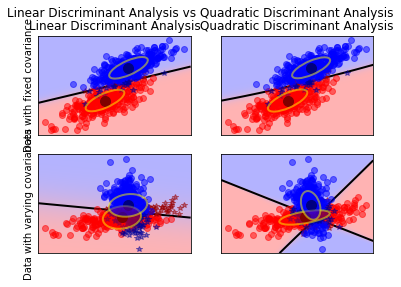

In [11]:
import sklearn
import numpy as np
import matplotlib as mpl
from scipy import linalg
from matplotlib import colors
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

###############################################################################
# colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

###############################################################################
# generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C), np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

###############################################################################
# plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with varying covariances')
 
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
 
    alpha = 0.5
 
    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha, color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha, color='#990000') # dark red
 
    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha, color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha, color='#000099')  # dark blue
 
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes', norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')
 
    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1], 'o', color='black', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1], 'o', color='black', markersize=10)
    
    return splot

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color, edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')

def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

###############################################################################
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LDA(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')
 
    # Quadratic Discriminant Analysis
    qda = QDA(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')

plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis')
plt.show()

## LDA与PCA

LDA与PCA都可以借助SVD求解，但本质是不同的：
![Text](pca_lda_compare.png)
顺便提一句之前梳理的独立成分分析（ICA）与PCA的差别，PCA立足点是相关性，是基于协方差矩阵（二阶统计量）;而ICA立足点是独立性，利用概率分布（也就是高阶统计量），当然如果是正态分布，二者就等价了。
![Text](pca_ica_compare.png)

explained variance ratio (first two components): [0.92461872 0.05306648]


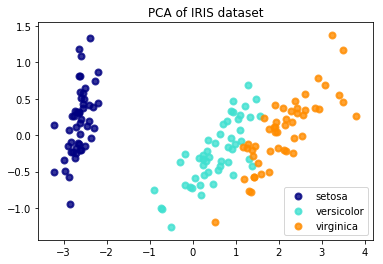

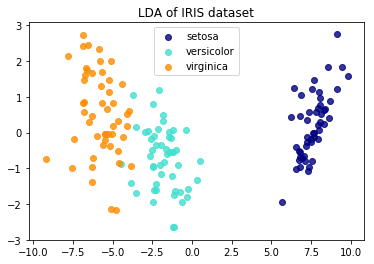

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
 
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
 
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
 
lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
 
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
lw = 2
colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

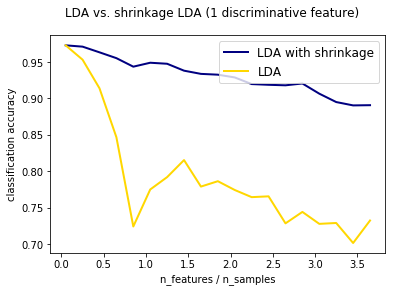

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.
 
    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.
 
    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y
 
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)
        clf1 = LDA(solver='lsqr', shrinkage = 'auto').fit(X, y)
        clf2 = LDA(solver='lsqr', shrinkage = None).fit(X, y)
        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2, label="LDA with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2, label="LDA", color='gold')
plt.xlabel('n_features / n_samples')
plt.ylabel('classification accuracy')
 
plt.legend(loc=1, prop={'size': 12})
plt.suptitle('LDA vs. shrinkage LDA (1 discriminative feature)')
plt.show()